In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [ ]:
# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Step 1. Data Load and Data understanding
---

In [ ]:
# Import files from local directory
data = pd.read_csv('train.csv')
unseen = pd.read_csv('test.csv')
data_dict = pd.read_csv("data_dictionary.csv")

In [ ]:
# Data shape
print("Shape of train dataset {},test dataset {}".format(data.shape,unseen.shape))

In [ ]:
# Check the columns
data.info(verbose=True)

In [ ]:
# Statistical details of the train dataset
data.describe()

# Step 2 : Data Prepatation
---
This includes
>   1. Dropping columns adding no business value
>   2. Dropping null columns
>   3. Missing value imputation
>   4. Dropping null rows

In [ ]:
# Date columns are not adding any values and we can drop them
date_cols = [col for col in data.columns if "date" in col]
date_cols

# Drop these cols
data.drop(date_cols,axis=1,inplace=True)
data.shape


In [ ]:
# Check the null value percatage for each column
empty_col = list(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

In [ ]:
# Delete cols more than 30% entries are missing
empty_col = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]*100)>30]
data.drop(empty_col,axis=1,inplace=True)
data.shape

In [ ]:
# Drop circle_id column as this is of no use for our analysis
data.drop("circle_id",axis=1,inplace=True)

In [ ]:
# Missing value treatment
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

In [ ]:
# Impute missing values with 0
data.fillna(0,inplace=True)
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

In [ ]:
# Check if any row has more than 50% missing values
data[data.isnull().sum(axis=1)/data.shape[1]*100 > 50]


In [ ]:
data.info(verbose = True)

#### Filter high value customer and apply churn classification on high value customers only. As they are the most revenue generator for the telecom operator. Amongst the columns that still present in our dataset after data preparation and clean up we assume arup_<month> can best indicate the potential high value customers

In [ ]:
# quantile of arpu_6,arpu_7
data[['arpu_6','arpu_7','arpu_8']].quantile([0.1,0.2,.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### From the above table we take the 25-30 percentile as bechmark ,arup above this  we consider the customers as stable and major revenue generator. We take a value of 100 as ARPU for all three months

In [ ]:
# Filter customer for whom arpu_6,7,8 >100
threshold= 100
data = data[(data['arpu_6']>threshold) & (data['arpu_7']>threshold) & (data['arpu_8']>threshold)]
data.shape

# Step 3: Create X, y and then Train test split.
---


In [ ]:
# Create X, y and Train Test Split
X = data.drop('churn_probability',axis=1)
y = data['churn_probability']

In [ ]:
# Standard scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# Step 4 : Logistic Regression model building [without PCA and SMOTE]
---

In [ ]:
# Build hyperparemeter tuned logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



In [ ]:
# instantiate the model
logreg = LogisticRegression(random_state=42)


In [ ]:
# Perform grid search CV for hyper paremeter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the model
logreg_cv.fit(X_train, y_train)



In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


In [ ]:
# Now build the model with best hyper paremeters
logreg = LogisticRegression(C=0.001,random_state=42)
logreg.fit(X_train, y_train)


In [ ]:
# Predict the model on train and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

## Step 4.1 - Model Evaluation
---
>   1. Classification report on train and test
>   2. Confusion matrix on train and test data
>   3. Accuracy score on train and test data
>   4. Sensitivity and Specificity on train and test data
>   5. F1 score on train and test data
>   6. ROC curve


In [ ]:
# Print the classification report on train and test data
print("Classification report on train data")
print(classification_report(y_train,y_train_pred))
print("Classification report on test data")
print(classification_report(y_test,y_test_pred))

In [ ]:
# Confusion matrix on train and test data
print("Confusion matrix on train data")
print(confusion_matrix(y_train,y_train_pred))
print("Confusion matrix on test data")
print(confusion_matrix(y_test,y_test_pred))

In [ ]:
# Accuracy score on train and test data
print("Accuracy score on train data")
print(accuracy_score(y_train,y_train_pred))
print("Accuracy score on test data")
print(accuracy_score(y_test,y_test_pred))

In [ ]:
# Sensitivity and Specificity on train and test data
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("Sensitivity on train data")
print(recall_score(y_train,y_train_pred))
print("Sensitivity on test data")
print(recall_score(y_test,y_test_pred))
print("Specificity on train data")
print(precision_score(y_train,y_train_pred))
print("Specificity on test data")
print(precision_score(y_test,y_test_pred))

In [ ]:
# F1 score on train and test data
from sklearn.metrics import f1_score

print("F1 score on train data")
print(f1_score(y_train,y_train_pred))
print("F1 score on test data")
print(f1_score(y_test,y_test_pred))

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Step 5 : Logistic Regression model building [with Class imbalance management]
---

In [ ]:
# Logistic regression with SMOTE and hyper parameter tuning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline 

# Create a SMOTE object
smote = SMOTE(random_state=42, sampling_strategy=1)

# Resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape,y_train_resampled.shape



In [96]:
logreg = LogisticRegression(random_state=42,max_iter=1000)


In [114]:
# Set up GridSearchCV with cross-validation
# Perform grid search CV for hyper paremeter tuning
param_grid = {'C': [ 0.01, 0.1, 1, 10, 15,50], 'penalty': ['l1', 'l2'], 'max_iter': [1000]}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)


In [ ]:
# Fit the model
logreg_cv.fit(X_train_resampled, y_train_resampled)

In [117]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 15, 'max_iter': 1000, 'penalty': 'l2'}
Best score is 0.8011438919850014


In [118]:
# Now build the model with best hyper paremeters
logreg = LogisticRegression(C=15,random_state=42,max_iter=1000,penalty='l2')
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=15, max_iter=1000, random_state=42)

In [119]:
# Predict on train and test data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)


## Step 5.1 - Evaluation of SMOTE enabled Logistic regression
---
>   1. Classification report on train and test
>   2. Confusion matrix on train and test data
>   3. Accuracy score on train and test data
>   4. Sensitivity and Specificity on train and test data
>   5. F1 score on train and test data
>   6. ROC curve

In [120]:
# Classification report on train and test
print("Classification report on train data")
print(classification_report(y_train_resampled,y_train_pred))
print("Classification report on test data")
print(classification_report(y_test,y_test_pred))


Classification report on train data
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     24651
           1       0.79      0.83      0.81     24651

    accuracy                           0.80     49302
   macro avg       0.80      0.80      0.80     49302
weighted avg       0.80      0.80      0.80     49302

Classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     10588
           1       0.10      0.76      0.18       387

    accuracy                           0.76     10975
   macro avg       0.55      0.76      0.52     10975
weighted avg       0.96      0.76      0.84     10975



In [121]:
# Confusion matrix on train and test data
print("Confusion matrix on train data")
print(confusion_matrix(y_train_resampled,y_train_pred))
print("Confusion matrix on test data")
print(confusion_matrix(y_test,y_test_pred))


Confusion matrix on train data
[[19050  5601]
 [ 4129 20522]]
Confusion matrix on test data
[[8075 2513]
 [  94  293]]


In [122]:
# Accuracy score on train and test data
print("Accuracy score on train data")
print(accuracy_score(y_train_resampled,y_train_pred))
print("Accuracy score on test data")
print(accuracy_score(y_test,y_test_pred))


Accuracy score on train data
0.8026449231268509
Accuracy score on test data
0.7624601366742597


In [123]:
# Sensitivity and Specificity on train and test data
print("Sensitivity on train data")
print(recall_score(y_train_resampled,y_train_pred))
print("Sensitivity on test data")
print(recall_score(y_test,y_test_pred))
print("Specificity on train data")
print(precision_score(y_train_resampled,y_train_pred))
print("Specificity on test data")
print(precision_score(y_test,y_test_pred))


Sensitivity on train data
0.8325017240679892
Sensitivity on test data
0.7571059431524548
Specificity on train data
0.785591241434751
Specificity on test data
0.10441910192444762


In [124]:
# F1 score on train and test data
print("F1 score on train data")
print(f1_score(y_train_resampled,y_train_pred))
print("F1 score on test data")
print(f1_score(y_test,y_test_pred))


F1 score on train data
0.8083664867845748
F1 score on test data
0.18352646414030693


AUC: 0.840


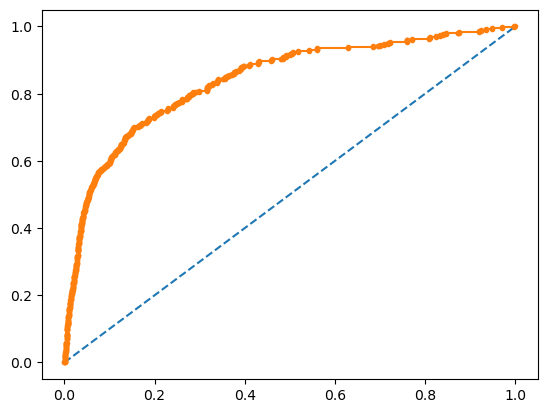

In [125]:
# ROC curve
# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


In [ ]:
coefficients = logreg.coef_[0]
feature_names = np.array(X_train.columns)
top_predictors = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
# Print the top predictor variables
for feature, coefficient in top_predictors:
    print(f"{feature}: {coefficient}")



    og_others_8: -1.9008637187890334
    offnet_mou_8: -1.404203036109441
    og_others_7: -1.294408538538787
    onnet_mou_8: 1.24265016237071
    arpu_8: 1.2042310901918056
    std_og_t2t_mou_8: -1.1942029899455455
    loc_og_t2t_mou_8: -1.0763757284023145
    std_og_t2m_mou_8: 1.0527699086550275
    offnet_mou_6: 0.8756524919883055
    total_rech_amt_8: -0.8433467173733428

# Step 6 : Logistic Regression Model Building with PCA
---

In [131]:
# PCA with 95% variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)
X_train_pca.shape,X_test_pca.shape

((49302, 62), (10975, 62))

In [132]:
# Create a new logistic regression model
logreg = LogisticRegression(C=15,random_state=42,max_iter=1000,penalty='l2')
logreg.fit(X_train_pca, y_train_resampled)


LogisticRegression(C=15, max_iter=1000, random_state=42)

In [133]:
# Predict on train and test data
y_train_pred = logreg.predict(X_train_pca)
y_test_pred = logreg.predict(X_test_pca)


## Step 6.1 : Evaluate Model (Logistic + PCA+ SMOTE)
---
>   1. Classification report on train and test
>   2. Confusion matrix on train and test data
>   3. Accuracy score on train and test data
>   4. Sensitivity and Specificity on train and test data
>   5. F1 score on train and test data
>   6. ROC curve

In [134]:
# Classification report on train and test
print("Classification report on train data")
print(classification_report(y_train_resampled,y_train_pred))
print("Classification report on test data")
print(classification_report(y_test,y_test_pred))


Classification report on train data
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     24651
           1       0.78      0.82      0.80     24651

    accuracy                           0.79     49302
   macro avg       0.79      0.79      0.79     49302
weighted avg       0.79      0.79      0.79     49302

Classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     10588
           1       0.11      0.78      0.19       387

    accuracy                           0.76     10975
   macro avg       0.55      0.77      0.52     10975
weighted avg       0.96      0.76      0.84     10975



In [135]:
# Confusion matrix on train and test data
print("Confusion matrix on train data")
print(confusion_matrix(y_train_resampled,y_train_pred))
print("Confusion matrix on test data")
print(confusion_matrix(y_test,y_test_pred))

Confusion matrix on train data
[[18887  5764]
 [ 4523 20128]]
Confusion matrix on test data
[[8035 2553]
 [  85  302]]


In [136]:
# Accuracy score on train and test data
print("Accuracy score on train data")
print(accuracy_score(y_train_resampled,y_train_pred))
print("Accuracy score on test data")
print(accuracy_score(y_test,y_test_pred))


Accuracy score on train data
0.7913472070098576
Accuracy score on test data
0.759635535307517


In [137]:
# Sensitivity and Specificity on train and test data
print("Sensitivity on train data")
print(recall_score(y_train_resampled,y_train_pred))
print("Sensitivity on test data")
print(recall_score(y_test,y_test_pred))
print("Specificity on train data")
print(precision_score(y_train_resampled,y_train_pred))
print("Specificity on test data")
print(precision_score(y_test,y_test_pred))

Sensitivity on train data
0.8165185996511297
Sensitivity on test data
0.7803617571059431
Specificity on train data
0.7773829754364282
Specificity on test data
0.10577933450087566


In [138]:
# F1 score on train and test data
print("F1 score on train data")
print(f1_score(y_train_resampled,y_train_pred))
print("F1 score on test data")
print(f1_score(y_test,y_test_pred))

F1 score on train data
0.7964703321923906
F1 score on test data
0.1863047501542258


AUC: 0.850


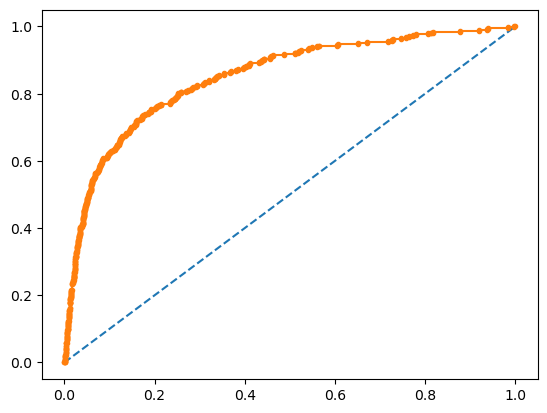

In [139]:
# ROC curve
# predict probabilities
probs = logreg.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Step 7 : Random Forest Model Building
---

In [140]:
# Random Forest Classification with hyper parameter tuning and SMOTE
from sklearn.ensemble import RandomForestClassifier


In [141]:
# instantiate a RandomForest Classifier
rfc = RandomForestClassifier(random_state=42)

In [142]:
# grid params for random forest hyperparameter tuning
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

In [143]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [144]:
# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [145]:
# best hyper parameters
print("Tuned Random Forest Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))


Tuned Random Forest Parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}
Best score is 0.8699647073141049


In [147]:
# Build new  model with best hyperparameters
rfc_best = grid_search.best_estimator_
rfc_best.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300, random_state=42)

In [149]:
# Predict on Train and Test Data
y_train_pred = rfc_best.predict(X_train_resampled)
y_test_pred = rfc_best.predict(X_test)

## Step 6.1 : Evaluate Model (RandomForest + SMOTE)
---
>   1. Classification report on train and test
>   2. Confusion matrix on train and test data
>   3. Accuracy score on train and test data
>   4. Sensitivity and Specificity on train and test data
>   5. F1 score on train and test data
>   6. ROC curve

In [150]:
# Classification report on train and test
print("Classification report on train data")
print(classification_report(y_train_resampled,y_train_pred))
print("Classification report on test data")
print(classification_report(y_test,y_test_pred))


Classification report on train data
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     24651
           1       0.90      0.84      0.87     24651

    accuracy                           0.87     49302
   macro avg       0.88      0.87      0.87     49302
weighted avg       0.88      0.87      0.87     49302

Classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     10588
           1       0.22      0.73      0.33       387

    accuracy                           0.90     10975
   macro avg       0.60      0.81      0.64     10975
weighted avg       0.96      0.90      0.92     10975



In [151]:
# Confusion matrix on train and test data
print("Confusion matrix on train data")
print(confusion_matrix(y_train_resampled,y_train_pred))
print("Confusion matrix on test data")
print(confusion_matrix(y_test,y_test_pred))


Confusion matrix on train data
[[22306  2345]
 [ 3890 20761]]
Confusion matrix on test data
[[9569 1019]
 [ 106  281]]


In [152]:
# Accuracy score on train and test data
print("Accuracy score on train data")
print(accuracy_score(y_train_resampled,y_train_pred))
print("Accuracy score on test data")
print(accuracy_score(y_test,y_test_pred))


Accuracy score on train data
0.873534542209241
Accuracy score on test data
0.89749430523918


In [153]:
# Sensitivity and Specificity on train and test data
print("Sensitivity on train data")
print(recall_score(y_train_resampled,y_train_pred))
print("Sensitivity on test data")
print(recall_score(y_test,y_test_pred))
print("Specificity on train data")
print(precision_score(y_train_resampled,y_train_pred))
print("Specificity on test data")
print(precision_score(y_test,y_test_pred))

Sensitivity on train data
0.8421970711127338
Sensitivity on test data
0.7260981912144703
Specificity on train data
0.898511209209729
Specificity on test data
0.21615384615384614


In [154]:
# F1 score on train and test data
print("F1 score on train data")
print(f1_score(y_train_resampled,y_train_pred))
print("F1 score on test data")
print(f1_score(y_test,y_test_pred))

F1 score on train data
0.8694432229830182
F1 score on test data
0.33313574392412565


AUC: 0.877


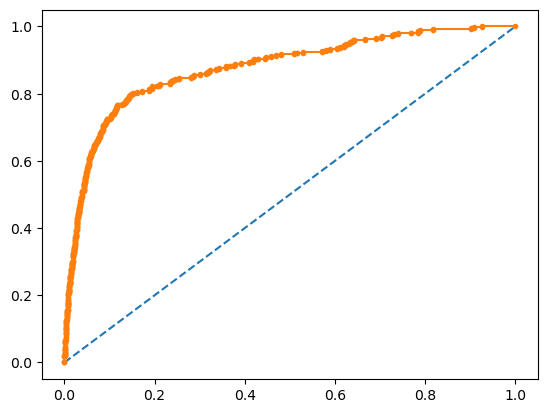

In [155]:
# ROC curve
# predict probabilities
probs = rfc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

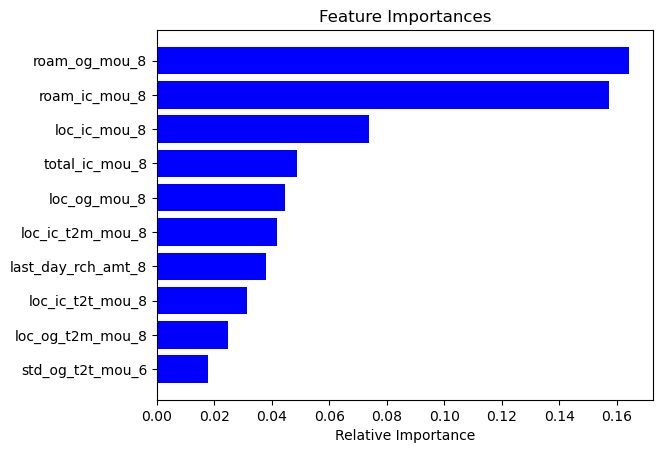

In [157]:
# Top 10 predictor variables
feature_importances = rfc_best.feature_importances_
features = X_train.columns
importances = feature_importances
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Step 8 : Random Forest Model Building with PCA
---

In [158]:
# Create base model
rfc_pca  = RandomForestClassifier(random_state=42)   

In [159]:
# grid params for random forest hyperparameter tuning
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

In [160]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Fit the model
grid_search.fit(X_train_pca, y_train_resampled)

In [ ]:
# best hyper parameters
print("Tuned Random Forest Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))

In [162]:
# Build new  model with best hyperparameters
rfc_pca_best = RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, random_state=42)


In [164]:
# Build new  model with best hyperparameters

rfc_pca_best.fit(X_train_pca, y_train_resampled)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, random_state=42)

In [ ]:
# Predict on Train and Test Data
y_train_pred = rfc_pca_best.predict(X_train_pca)
y_test_pred = rfc_pca_best.predict(X_test_pca)

## Step 8.1 : Evaluate Model (RandomForest + SMOTE + PCA)
---
>   1. Classification report on train and test
>   2. Confusion matrix on train and test data
>   3. Accuracy score on train and test data
>   4. Sensitivity and Specificity on train and test data
>   5. F1 score on train and test data
>   6. ROC curve

In [165]:
# Classification report on train and test
print("Classification report on train data")
print(classification_report(y_train_resampled,y_train_pred))
print("Classification report on test data")
print(classification_report(y_test,y_test_pred))

Classification report on train data
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     24651
           1       0.90      0.84      0.87     24651

    accuracy                           0.87     49302
   macro avg       0.88      0.87      0.87     49302
weighted avg       0.88      0.87      0.87     49302

Classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     10588
           1       0.22      0.73      0.33       387

    accuracy                           0.90     10975
   macro avg       0.60      0.81      0.64     10975
weighted avg       0.96      0.90      0.92     10975



In [166]:
# Confusion matrix on train and test data
print("Confusion matrix on train data")
print(confusion_matrix(y_train_resampled,y_train_pred))
print("Confusion matrix on test data")
print(confusion_matrix(y_test,y_test_pred))

Confusion matrix on train data
[[22306  2345]
 [ 3890 20761]]
Confusion matrix on test data
[[9569 1019]
 [ 106  281]]


In [167]:
# Sensitivity and Specificity on train and test data
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_recall_curve,precision_score,roc_auc_score,roc_curve

print(recall_score(y_train_resampled,y_train_pred))
print("Sensitivity on test data")
print(recall_score(y_test,y_test_pred))
print("Specificity on train data")
print(precision_score(y_train_resampled,y_train_pred))
print("Specificity on test data")
print(precision_score(y_test,y_test_pred))

0.8421970711127338
Sensitivity on test data
0.7260981912144703
Specificity on train data
0.898511209209729
Specificity on test data
0.21615384615384614


AUC: 0.820


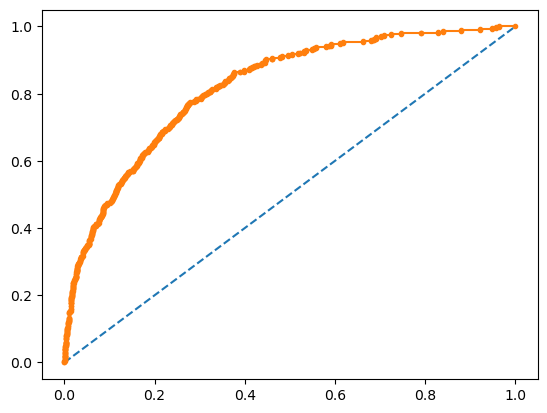

In [168]:
# ROC curve
# predict probabilities
probs = rfc_pca_best.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Conclusion
---
After comapreing different models in different context ( PCA and with no PCA) our concluysion is that we will go for the Random Forest Classifier with no PCA. This model gives the highest AUC (88%) and relatively higher accuracy.

    Sensitivity on train data
    0.8421970711127338
    Sensitivity on test data
    0.7260981912144703
    Specificity on train data
    0.898511209209729
    Specificity on test data
    0.21615384615384614
Also we found the top 10 predictor variables

![alt text](image.png)


# Creating submission file
---
For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [171]:
sample = pd.read_csv('sample.csv')
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [172]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [176]:
# Ensure submission_data has the same column names as X_train
submission_data = unseen[X_train.columns]

# Predict churn probabilities for submission_data
unseen['churn_probability'] = rfc_best.predict(submission_data)

# Create output dataframe with 'id' and 'churn_probability' columns
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,1
1,70000,1
2,70001,1
3,70002,1
4,70003,1


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [177]:
output.to_csv('submission_pca_sayak_bhattacharjee.csv',index=False)